# Hexagonal resistor sparse

Here we find the resistance between two arbitrary points in a hexagonal resistor grid with the aim of determining the limiting behaviour as the grid becomes infinite. 

As an example, here is a 4 x 4 grid. N, the number of sites in x, y needs to be even to maintain these boundary conditions. 

<img src="net.png" width="300"> 

In [3]:
import numpy as np
from scipy.linalg import solve
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3
from functions import make_matrix

In [4]:
# N can only be even
Ns = [8,16,32,64,128,256]
Rs = []


for N in Ns:
    offsets = [-N,-2*N]
    for offset in offsets:
        # The matrix describing the interconnects
        Adata_csr = make_matrix(N)

        # The vector of currents
        I = np.zeros(N**2)

        # Defines the point with the first current source
        i , j = N//2, N//2
        point = N*i+j
        I[point] = 1

        # And the second current source
        I[point+offset] = -1

        #Solve the matrix equation for the voltage vector
        V = spsolve(Adata_csr,I)

        # Determine the resistance
        R = V[point]- V[point+offset]
        Rs.append(R)
    

R_N_offsets = [(Rs[2*i]) for i in range(len(Rs)//2)]
R_2N_offsets = [(Rs[2*i + 1]) for i in range(len(Rs)//2)]

print(R_N_offsets, R_2N_offsets)

[0.8125, 0.67041015625, 0.6668701171875, 0.666748046875, 0.6666841506958008, 0.6666704416275024] [1.0625, 1.0029296875, 1.0010986328125, 1.0001678466796875, 1.000040054321289, 1.0000123977661133]


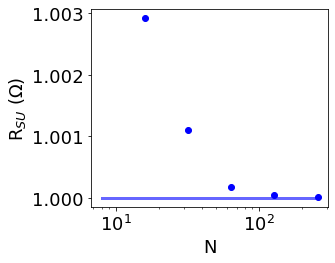

In [14]:
fig,ax = plt.subplots(1,1,figsize = [5,4])
#ax.semilogx([8,256],[2/3,2/3], '-', color = 'red', alpha = 0.6)
ax.semilogx([8,256],[1,1], '-', color = 'blue', alpha = 0.6)

#ax.semilogx(Ns[1:],R_N_offsets[1:], '.', markersize = 12, color = 'red', label = 'NN', alpha = 1)
ax.semilogx(Ns[1:],R_2N_offsets[1:], '.', markersize = 12, color = 'blue', label = 'NNN', alpha = 1)


#ax.set_xlim([8,256])
#ax.set_ylim([0,1.1])
ax.set_xlabel('N')
ax.set_ylabel('R$_{SU}$ ($\Omega$)')
#ax.legend(frameon = False)
fig.tight_layout()
fig.savefig('resistances_NNN.png', dpi = 150, facecolor = 'w')